# FakeNewsDetection

In [1]:
pip install pythainlp

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import pythainlp
from pythainlp import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from pythainlp.corpus import get_corpus
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

C:\Users\GGyz\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
C:\Users\GGyz\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org

# รวมไฟล์ Fake News แะ Real Newsไว้ที่ manual_testing.csv

In [3]:
df = pd.read_csv('manual_testing.csv')
df.head(115)

,Unnamed: 0,no,text,date,class
0,0,1,ยอดผู้ติดเชื้อโควิด19 วันศุกร์ที่ 30 กรกฏาคม 2...,30 กรกฏาคม 2564,0
1,1,2,"สถานการณ์ โควิด19 ในประเทศไทย ติดเชื้อ 17,345 ...",30 กรกฏาคม 2564,0
2,2,3,จำนวนผู้ติดเชื้อ โควิด19 จากคลัสเตอร์ใหม่ที่พบ...,29 กรกฏาคม 2564,0
3,3,4,"443 ราย ติดเชื้อครอบครัว,ที่ทำงาน,ตลาด เด็กต่ำ...",30 กรกฏาคม 2564,0
4,4,5,30 กรกฎาคม 64 สถานการณ์ โควิด19 ในประเทศไทย ตั...,30 กรกฏาคม 2564,0
5,5,6,"ชลบุรี ติดเชื้อ ยอดพุ่ง 1,062 ราย สสจ.ชลบุรี ...",31 กรกฏาคม 2564,0
6,6,7,ภูเก็ต วันนี้ 30 กรกฏาคมคมคม 2564 ข้อมูล ณ เวล...,30 กรกฏาคม 2564,0
7,7,8,รายงาน ถึงวันที่30 กรกฎาคม 2564 ฉีดสะสมแล้วจำน...,31 กรกฏาคม 2564,0
8,8,9,"ยอดผู้ติดเชื้อ หลังจากประกาศล็อคดาวน์ 12/7 8,6...",14 กรกฏาคม 2564,0
9,9,10,โควิด19 เสียชีวิต 21 ราย สะสม 265 ราย ติดเชื้อ...,2 พฤษภาคม 2564,0


In [4]:
df = df.drop(columns=[ 'date'], axis=1)

In [5]:
df = df.dropna(axis=0)

In [6]:
len(df)

115

In [7]:
df['clean_news'] = df['text'].str.lower()
df['clean_news']

0      ยอดผู้ติดเชื้อโควิด19 วันศุกร์ที่ 30 กรกฏาคม 2...
1      สถานการณ์ โควิด19 ในประเทศไทย ติดเชื้อ 17,345 ...
2      จำนวนผู้ติดเชื้อ โควิด19 จากคลัสเตอร์ใหม่ที่พบ...
3      443 ราย ติดเชื้อครอบครัว,ที่ทำงาน,ตลาด เด็กต่ำ...
4      30 กรกฎาคม 64 สถานการณ์ โควิด19 ในประเทศไทย ตั...
5      ชลบุรี ติดเชื้อ  ยอดพุ่ง 1,062 ราย สสจ.ชลบุรี ...
6      ภูเก็ต วันนี้ 30 กรกฏาคมคมคม 2564 ข้อมูล ณ เวล...
7      รายงาน ถึงวันที่30 กรกฎาคม 2564 ฉีดสะสมแล้วจำน...
8      ยอดผู้ติดเชื้อ หลังจากประกาศล็อคดาวน์ 12/7 8,6...
9      โควิด19 เสียชีวิต 21 ราย สะสม 265 ราย ติดเชื้อ...
10     วันนี้มีรายงานผู้ติดเชื้อ รายใหม่ เพิ่มอีก 153...
11     วันอาทิตย์ที่ 2 พฤษภาคม 2564  เวลา 11.30 น.สถา...
12     ข่าวดีวันนี้ น้องชายได้กลับบ้านแล้ว หลังรักษาต...
13     ปลัดกลาโหม ออกหนังสือ ขอสนับสนุนพื้นที่ทำ โรงพ...
14     เมื่อโควิด19บุกร่าง จะมีการอักเสบ ฉับพลันเปรีย...
15     วัดบางม่วง จังหวัดนนทบุรี รับเผาศพผู้ป่วยโควิด...
16     การฉีดวัคซีน​  มีประสิทธิภาพสูงสุด​ 6 เดือน​ ถ...
17     ที่บอกอย่าบังคับคนให้ฉีด

In [8]:
FAKE='''
ยอดผู้ติดเชื้อโควิด19 วันศุกร์ที่ 30 กรกฏาคมคมคม 2564 รวม 17,345 ราย 
ผู้ป่วยสะสม 549,512 ราย ตั้งแต่ 1 เมษายน หายป่วยกลับบ้าน 10,678 ราย 
หายป่วยสะสม 353,744 ราย ตั้งแต่ 1 เมษายน ผู้ป่วยกำลังรักษา 192,526 ราย 
เสียชีวิต 117 ราย

จำนวนผู้ติดเชื้อ โควิด19 จากคลัสเตอร์ใหม่ที่พบ ณ วันที่ 29 ก.ค. 64 สมุทรสาคร 
โรงงานผลิตภัณฑ์ปลา, บริษัทยางรถยนต์ รวม 27 ราย ปทุมธานี บริษัทยางรถยนต์ 25 ราย 
สมุทรปราการ บริษัทระบบกำลังไฟฟ้า 10 ราย ชลบุรี โรงงานเครื่องปรับอากาศ 15 ราย 
สงขลา โรงงานแม่แบบเซรามิค 13 ราย

30 ก.ค. 64 สถานการณ์ โควิด19 ในประเทศไทย ตั้งแต่ 1เมษายน 2564 
รวม 17,345 ราย ผู้ป่วยสะสม 549,512 ราย ตั้งแต่ 1 เมษายน หายป่วยกลับบ้าน 10,678 ราย
หายป่วยสะสม 353,744 ราย ตั้งแต่ 1 เมษายน ผู้ป่วยกำลังรักษา 192,526 ราย เสียชีวิต 117 ราย 

กทม.พบผู้ติดเชื้อ วันนี้ เพิ่ม 539 ราย อยู่ระหว่างการสอบสวนโรค 302 ราย 
โดยเขตที่มีผู้ติดเชื้อวันนี้สูงสุดประกอบด้วย จตุจักร 16 ราย บางซื่อ 13 ราย 
เขตที่ไม่มีผู้ติดเชื้อในวันนี้มี 9 เขต คือ ดอนเมือง บางกอกใหญ่ บางบอน
บางรัก ป้อมปราบฯ พระโขนง ลาดกระบัง สะพานสูง และหนองจอก

'''
print(FAKE)


ยอดผู้ติดเชื้อโควิด19 วันศุกร์ที่ 30 กรกฏาคมคมคม 2564 รวม 17,345 ราย 
ผู้ป่วยสะสม 549,512 ราย ตั้งแต่ 1 เมษายน หายป่วยกลับบ้าน 10,678 ราย 
หายป่วยสะสม 353,744 ราย ตั้งแต่ 1 เมษายน ผู้ป่วยกำลังรักษา 192,526 ราย 
เสียชีวิต 117 ราย

จำนวนผู้ติดเชื้อ โควิด19 จากคลัสเตอร์ใหม่ที่พบ ณ วันที่ 29 ก.ค. 64 สมุทรสาคร 
โรงงานผลิตภัณฑ์ปลา, บริษัทยางรถยนต์ รวม 27 ราย ปทุมธานี บริษัทยางรถยนต์ 25 ราย 
สมุทรปราการ บริษัทระบบกำลังไฟฟ้า 10 ราย ชลบุรี โรงงานเครื่องปรับอากาศ 15 ราย 
สงขลา โรงงานแม่แบบเซรามิค 13 ราย

30 ก.ค. 64 สถานการณ์ โควิด19 ในประเทศไทย ตั้งแต่ 1เมษายน 2564 
รวม 17,345 ราย ผู้ป่วยสะสม 549,512 ราย ตั้งแต่ 1 เมษายน หายป่วยกลับบ้าน 10,678 ราย
หายป่วยสะสม 353,744 ราย ตั้งแต่ 1 เมษายน ผู้ป่วยกำลังรักษา 192,526 ราย เสียชีวิต 117 ราย 

กทม.พบผู้ติดเชื้อ วันนี้ เพิ่ม 539 ราย อยู่ระหว่างการสอบสวนโรค 302 ราย 
โดยเขตที่มีผู้ติดเชื้อวันนี้สูงสุดประกอบด้วย จตุจักร 16 ราย บางซื่อ 13 ราย 
เขตที่ไม่มีผู้ติดเชื้อในวันนี้มี 9 เขต คือ ดอนเมือง บางกอกใหญ่ บางบอน
บางรัก ป้อมปราบฯ พระโขนง ลาดกระบัง สะพานสูง 

In [9]:
words = word_tokenize(FAKE)
print(words)

['\n', 'ยอด', 'ผู้', 'ติดเชื้อ', 'โควิด', '19', ' ', 'วัน', 'ศุกร์', 'ที่', ' ', '30', ' ', 'กรก', 'ฏาคมคมคม', ' ', '2564', ' ', 'รวม', ' ', '17,345', ' ', 'ราย', ' ', '\n', 'ผู้ป่วย', 'สะสม', ' ', '549,512', ' ', 'ราย', ' ', 'ตั้งแต่', ' ', '1', ' ', 'เมษายน', ' ', 'หายป่วย', 'กลับบ้าน', ' ', '10,678', ' ', 'ราย', ' ', '\n', 'หายป่วย', 'สะสม', ' ', '353,744', ' ', 'ราย', ' ', 'ตั้งแต่', ' ', '1', ' ', 'เมษายน', ' ', 'ผู้ป่วย', 'กำลัง', 'รักษา', ' ', '192,526', ' ', 'ราย', ' ', '\n', 'เสียชีวิต', ' ', '117', ' ', 'ราย', '\n', '\n', 'จำนวน', 'ผู้', 'ติดเชื้อ', ' ', 'โควิด', '19', ' ', 'จาก', 'คลัสเตอร์', 'ใหม่', 'ที่', 'พบ', ' ', 'ณ', ' ', 'วันที่', ' ', '29', ' ', 'ก.ค.', ' ', '64', ' ', 'สมุทรสาคร', ' ', '\n', 'โรงงาน', 'ผลิตภัณฑ์', 'ปลา', ',', ' ', 'บริษัท', 'ยางรถยนต์', ' ', 'รวม', ' ', '27', ' ', 'ราย', ' ', 'ปทุมธานี', ' ', 'บริษัท', 'ยางรถยนต์', ' ', '25', ' ', 'ราย', ' ', '\n', 'สมุทรปราการ', ' ', 'บริษัท', 'ระบบ', 'กำลังไฟฟ้า', ' ', '10', ' ', 'ราย', ' ', 'ชลบุรี', ' ', 'โรงงาน

In [10]:
all_words = ' '.join(words).lower().strip()
# all_word = re.sub('(\n|\s{2})', '', all_words)
all_words[:500]

'ยอด ผู้ ติดเชื้อ โควิด 19   วัน ศุกร์ ที่   30   กรก ฏาคมคมคม   2564   รวม   17,345   ราย   \n ผู้ป่วย สะสม   549,512   ราย   ตั้งแต่   1   เมษายน   หายป่วย กลับบ้าน   10,678   ราย   \n หายป่วย สะสม   353,744   ราย   ตั้งแต่   1   เมษายน   ผู้ป่วย กำลัง รักษา   192,526   ราย   \n เสียชีวิต   117   ราย \n \n จำนวน ผู้ ติดเชื้อ   โควิด 19   จาก คลัสเตอร์ ใหม่ ที่ พบ   ณ   วันที่   29   ก.ค.   64   สมุทรสาคร   \n โรงงาน ผลิตภัณฑ์ ปลา ,   บริษัท ยางรถยนต์   รวม   27   ราย   ปทุมธานี   บริษัท ยางรถยนต์   2'

# StopWords

In [11]:
stopwords = {'ราย'} # set
print(type(stopwords))
print(stopwords)

<class 'set'>
{'ราย'}


# WordCloud

(-0.5, 799.5, 499.5, -0.5)

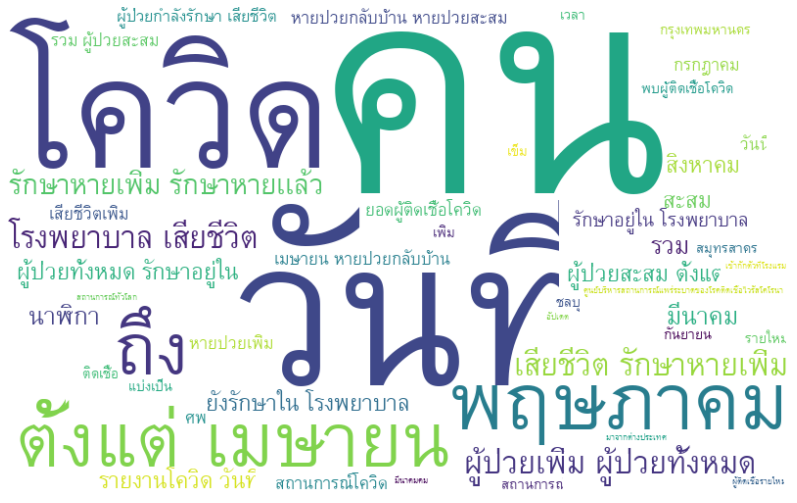

In [13]:
all_words = " ".join([sentence for sentence in df['clean_news']])
all_words[:500]
wordcloud = WordCloud(font_path='c:/windows/fonts/browalia.ttc',
    regexp='[ก-๙]+', stopwords=stopwords,width=800, height=500, random_state=42,prefer_horizontal=1,
    max_words=50,  background_color = 'white').generate(all_words)

# plot the graph
plt.figure(figsize=(15, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
#plt.show()

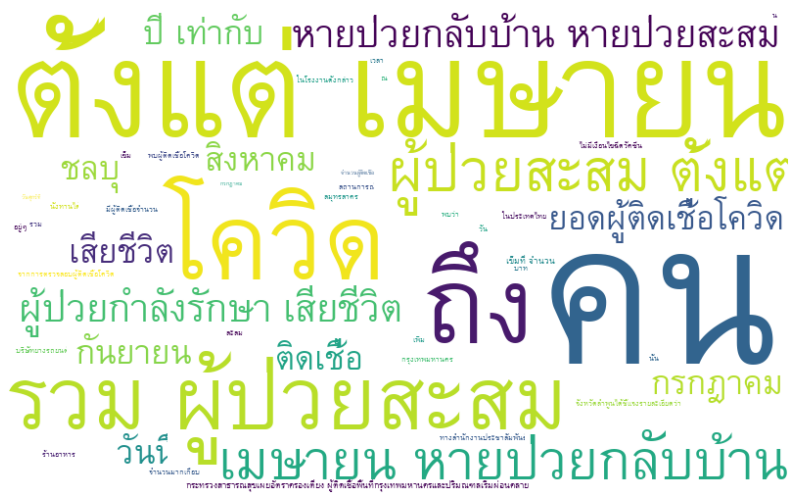

In [14]:
all_words = " ".join([sentence for sentence in df['clean_news'][df['class']==0]])
all_words[:500]

wordcloud = WordCloud(font_path='c:/windows/fonts/browalia.ttc',
    regexp='[ก-๙]+', stopwords=stopwords,width=800, height=500, random_state=50,prefer_horizontal=1,
    max_words=50,  background_color = 'white').generate(all_words)


# plot the graph
plt.figure(figsize=(15, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

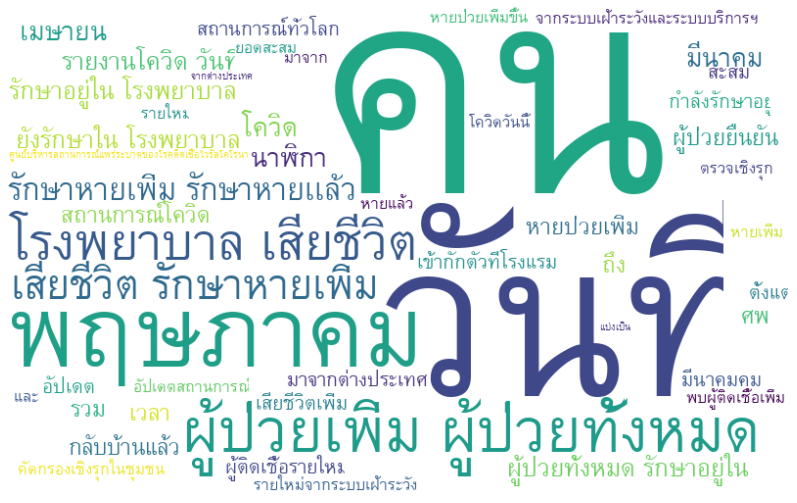

In [15]:
all_words = " ".join([sentence for sentence in df['text'][df['class']==1]])
all_words[:500]

wordcloud = WordCloud(font_path='c:/windows/fonts/browalia.ttc',
    regexp='[ก-๙]+', stopwords=stopwords,width=800, height=500, random_state=42,prefer_horizontal=1,
    max_words=50,  background_color = 'white').generate(all_words)


# plot the graph
plt.figure(figsize=(15, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Random Forest

In [16]:
x = df["text"]
y = df["class"]

In [17]:
x_train,x_test,y_tarin,y_test = train_test_split(x,y,test_size=.25)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
vectrorization = TfidfVectorizer()
xv_train = vectrorization.fit_transform(x_train)
xv_test = vectrorization.transform(x_test)

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train,y_tarin)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [22]:
RFC.score(xv_test,y_test)

0.8275862068965517

In [23]:
pred_RFC = RFC.predict(xv_test)

In [24]:
print(classification_report(y_test,pred_RFC))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        22
           1       0.67      0.57      0.62         7

   micro avg       0.83      0.83      0.83        29
   macro avg       0.77      0.74      0.75        29
weighted avg       0.82      0.83      0.82        29



# LSTM

In [27]:
x.shape

(115,)

In [28]:
y.shape

(115,)

In [33]:
# Now let's import Necessary libraries for LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM,Bidirectional
from tensorflow.keras.layers import Dense,Dropout

In [39]:
import pandas as pd

In [40]:
df=pd.read_csv('manual_testing.csv')

In [41]:
df.head()

,Unnamed: 0,no,text,date,class
0,0,1,ยอดผู้ติดเชื้อโควิด19 วันศุกร์ที่ 30 กรกฏาคม 2...,30 กรกฏาคม 2564,0
1,1,2,"สถานการณ์ โควิด19 ในประเทศไทย ติดเชื้อ 17,345 ...",30 กรกฏาคม 2564,0
2,2,3,จำนวนผู้ติดเชื้อ โควิด19 จากคลัสเตอร์ใหม่ที่พบ...,29 กรกฏาคม 2564,0
3,3,4,"443 ราย ติดเชื้อครอบครัว,ที่ทำงาน,ตลาด เด็กต่ำ...",30 กรกฏาคม 2564,0
4,4,5,30 กรกฎาคม 64 สถานการณ์ โควิด19 ในประเทศไทย ตั...,30 กรกฏาคม 2564,0


In [42]:
###Drop Nan Values
df=df.dropna()

In [43]:
## Get the Independent Features

X=df.drop('class',axis=1)

In [44]:
## Get the Dependent features
y=df['class']

In [45]:
X.shape

(115, 4)

In [46]:
y.shape

(115,)

In [47]:
import tensorflow as tf

In [48]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [74]:
from sklearn.metrics import confusion_matrix

In [49]:
### Vocabulary size
voc_size=5000

In [50]:
messages=X.copy()

In [51]:
messages.reset_index(inplace=True)

In [52]:
import nltk
import re
from nltk.corpus import stopwords

In [53]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GGyz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [57]:
### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[[ก-๙]+]', ' ', messages['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [58]:
one_hot_lbls = [one_hot(words,voc_size)for words in corpus]
one_hot_lbls

[[313,
  3578,
  481,
  3496,
  2975,
  405,
  1557,
  1184,
  2555,
  3889,
  4477,
  3215,
  2555,
  1785,
  2170,
  1655,
  1433,
  1081,
  4374,
  2555,
  393,
  1522,
  3039,
  2555,
  1785,
  2170,
  1655,
  4391,
  4311,
  3946,
  2555,
  2021,
  706,
  2555],
 [3106, 1099, 1571, 4495, 1557, 1184, 2021, 706, 2555],
 [4160,
  1099,
  1465,
  3709,
  4614,
  712,
  1380,
  1616,
  574,
  3274,
  4063,
  405,
  4009,
  2555,
  1109,
  4063,
  1485,
  2555,
  1788,
  4530,
  1081,
  2555,
  4070,
  3947,
  4784,
  2555,
  953,
  2490,
  338,
  2555],
 [3696,
  2555,
  2370,
  66,
  3931,
  4069,
  2675,
  1642,
  2325,
  422,
  1642,
  1488,
  1611,
  1770,
  1374,
  3660,
  1642,
  1786,
  2172,
  52,
  2740,
  2073,
  2248,
  1423,
  1648,
  481],
 [481,
  1380,
  1616,
  3106,
  1099,
  1571,
  1785,
  1749,
  2975,
  405,
  1557,
  1184,
  2555,
  3889,
  4477,
  3215,
  2555,
  1785,
  2170,
  1655,
  1433,
  1081,
  4374,
  2555,
  393,
  1522,
  3039,
  2555,
  1785,
  2170,


In [59]:
Embedded_len = pad_sequences(one_hot_lbls,padding='pre',maxlen=20)
print(Embedded_len)

[[2170 1655 1433 ... 2021  706 2555]
 [   0    0    0 ... 2021  706 2555]
 [4063  405 4009 ... 2490  338 2555]
 ...
 [   0    0    0 ... 4878  481 3591]
 [   0    0    0 ...  581 1099 2962]
 [   0    0    0 ... 1671 2675 2686]]


In [60]:
## Creating model Using LSTM
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=20))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            200000    
                                                                 
 dropout (Dropout)           (None, 20, 40)            0         
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [61]:
## Creating model Using LSTM
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=20))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 40)            200000    
                                                                 
 dropout_2 (Dropout)         (None, 20, 40)            0         
                                                                 
 bidirectional (Bidirectiona  (None, 200)              112800    
 l)                                                              
                                                                 
 dropout_3 (Dropout)         (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 313,001
Trainable params: 313,001
Non-trainable params: 0
________________________________________________

In [62]:
X_final = np.array(Embedded_len)
y_final = np.array(y)

In [63]:
X_final.shape,y_final.shape

((115, 20), (115,))

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [65]:
### Finally Training
model_fit =  model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
2/2 [==============================] - 16s 3s/step - loss: 0.6894 - accuracy: 0.7273 - val_loss: 0.6771 - val_accuracy: 0.6579
Epoch 2/10
2/2 [==============================] - 0s 49ms/step - loss: 0.6752 - accuracy: 0.5974 - val_loss: 0.6608 - val_accuracy: 0.6579
Epoch 3/10
2/2 [==============================] - 0s 44ms/step - loss: 0.6589 - accuracy: 0.5974 - val_loss: 0.6407 - val_accuracy: 0.6579
Epoch 4/10
2/2 [==============================] - 0s 44ms/step - loss: 0.6349 - accuracy: 0.5974 - val_loss: 0.6153 - val_accuracy: 0.6579
Epoch 5/10
2/2 [==============================] - 0s 47ms/step - loss: 0.5953 - accuracy: 0.5974 - val_loss: 0.5863 - val_accuracy: 0.6579
Epoch 6/10
2/2 [==============================] - 0s 48ms/step - loss: 0.5509 - accuracy: 0.6104 - val_loss: 0.5752 - val_accuracy: 0.6842
Epoch 7/10
2/2 [==============================] - 0s 50ms/step - loss: 0.5051 - accuracy: 0.6753 - val_loss: 0.6364 - val_accuracy: 0.7368
Epoch 8/10
2/2 [============

In [71]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)

In [80]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [81]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x19c767a89e8>)

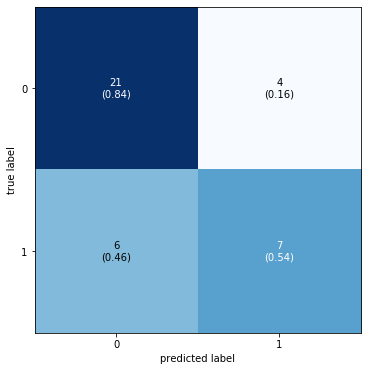

In [82]:
mat = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(mat,figsize=(6,6),show_normed=True)

In [83]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7368421052631579